**Name:** Abithan A.  
**Index No.:** 210019E

[View GitHub Repository](https://github.com/Abithan07/Neural-Networks.git)

In [38]:
import torch
import torch .nn as nn
import torch .optim as optim
import torchvision
import torchvision .transforms as transforms
import matplotlib . pyplot as plt

In [39]:
# 1. Dataloading

transform = transforms.Compose(
    [ transforms .ToTensor() ,
    transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])

batch_size = 50

trainset = torchvision . datasets .CIFAR10(root=r'D:\semi 5\IP&CV\Assignment 3\data', train=True, download=True, transform=transform)

trainloader = torch. utils .data.DataLoader(trainset , batch_size=batch_size , shuffle=True, num_workers=2)

testset = torchvision . datasets .CIFAR10(root=r'D:\semi 5\IP&CV\Assignment 3\data', train=False , download=True, transform=transform)

testloader = torch. utils .data.DataLoader( testset , batch_size=batch_size , shuffle=False , num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [40]:
# 2. Define Network Parameters
Din = 3 * 32 * 32 # Input size (flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

In [41]:
# 3. Training Loop
for t in range(iterations ):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        # Get inputs and labels
        inputs , labels = data
        Ntr = inputs.shape[0] # Batch size
        x_train = inputs.view(Ntr, -1) # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels , K). float () # Convert labels to one=hot encoding
        
        # Forward pass
        y_pred = x_train.mm(w) + b # Output layer activation
        
        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w**2)
        loss_history.append(loss.item())
        running_loss += loss.item()
        
        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)
        
        # Parameter update
        w -= lr * dw
        b -= lr * db
        
    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t +1}/{ iterations}, Loss:{ running_loss/len ( trainloader )} " )
    
    # Learning rate decay
    lr *= lr_decay

Epoch 1/20, Loss:0.9769322254657745 
Epoch 2/20, Loss:0.9498076413869858 
Epoch 3/20, Loss:0.9360702968835831 
Epoch 4/20, Loss:0.927522954583168 
Epoch 5/20, Loss:0.921589475274086 
Epoch 6/20, Loss:0.9171899755597115 
Epoch 7/20, Loss:0.9137785875797272 
Epoch 8/20, Loss:0.9110520014166832 
Epoch 9/20, Loss:0.9088228416442871 
Epoch 10/20, Loss:0.9069706878066063 
Epoch 11/20, Loss:0.9054107605218887 
Epoch 12/20, Loss:0.9040836632847786 
Epoch 13/20, Loss:0.9029455233812332 
Epoch 14/20, Loss:0.9019627064466477 
Epoch 15/20, Loss:0.9011088545918464 
Epoch 16/20, Loss:0.90036413615942 
Epoch 17/20, Loss:0.8997115439772606 
Epoch 18/20, Loss:0.8991382084488869 
Epoch 19/20, Loss:0.8986329915523529 
Epoch 20/20, Loss:0.8981865077614785 


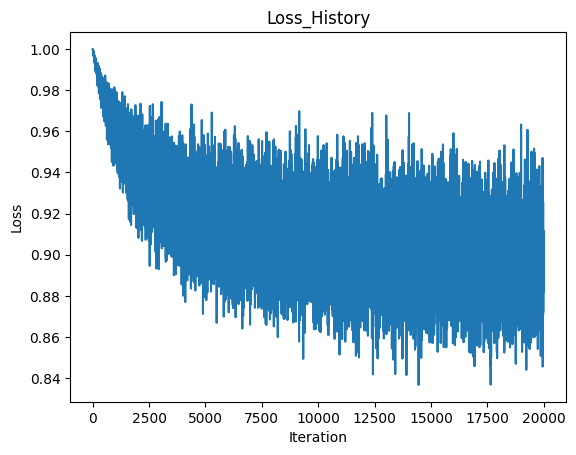

In [42]:
# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss_History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [43]:
# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch .no_grad ():
    for data in trainloader :
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()
        
        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred ,dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
        
train_acc = 100 * correct_train / total_train
print(f"Training accuracy :{ train_acc :.2f}%")

Training accuracy :32.20%


In [44]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0

with torch .no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
        
test_acc = 100 * correct_test / total_test
print(f"Test accuracy : {test_acc : .2f}%")

Test accuracy :  32.41%


##### 1. Listing 1 shows the code for a single dense layer network with manually computed forward path and backpropagations. Do the following changes
 (a) Add a middle layer with 100 nodes and a sigmoid activation.<br>
 (b) Use cross-entropy loss<br>
 (c) Run the network for 10 epochs nad report the taining and test accuracies.

In [45]:
# Model definition
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 100)  # Input to hidden layer with 100 nodes
        self.sigmoid = nn.Sigmoid()             # Sigmoid activation
        self.fc2 = nn.Linear(100, 10)           # 100 Hidden layer nodes to output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

In [46]:
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # learning rate = 0.01, momentum = 0.9

# Dataloading and transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root=r'D:\semi 5\IP&CV\Assignment 3\data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=r'D:\semi 5\IP&CV\Assignment 3\data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [47]:
# Training loop
epochs = 10
for epoch in range(epochs): 
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.view(inputs.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

Epoch 1, Loss: 1.8408359371423721
Epoch 2, Loss: 1.6884682569503784
Epoch 3, Loss: 1.6225764224529267
Epoch 4, Loss: 1.5711003398895265
Epoch 5, Loss: 1.5272137155532837
Epoch 6, Loss: 1.4845098695755006
Epoch 7, Loss: 1.445286575436592
Epoch 8, Loss: 1.4083932304382325
Epoch 9, Loss: 1.3752730144262313
Epoch 10, Loss: 1.3458236392736436


In [48]:
# Test accuracy calculation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network : {100 * correct / total}%')


Accuracy of the network : 47.98%


##### 2. Create a LeNet-5 network for MNIST using Pytorch. Report the training and test accuracies after 10 epochs.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 1 input channel (grayscale), 6 output channels, 5x5 kernel size
        self.pool = nn.AvgPool2d(2, 2)   # Average pooling with 2x2 kernel size and stride 2
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input channels, 16 output channels, 5x5 kernel size
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 16 channels, 4x4 image size after pooling, 120 output features
        self.fc2 = nn.Linear(120, 84) # 120 input features, 84 output features
        self.fc3 = nn.Linear(84, 10)  # 84 input features, 10 output features/classes for MNIST

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))
        x = self.pool(torch.tanh(self.conv2(x))) 
        x = x.view(-1, 16 * 4 * 4)  # Flatten the 16x4x4 tensor into a 1D tensor
        x = torch.tanh(self.fc1(x)) 
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x) 
        return x

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root=r'D:\semi 5\IP&CV\Assignment 3\data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root=r'D:\semi 5\IP&CV\Assignment 3\data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10): 
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Epoch 1, Loss: 1.5365, Training Accuracy: 55.22%
Epoch 2, Loss: 0.5226, Training Accuracy: 86.18%
Epoch 3, Loss: 0.3634, Training Accuracy: 89.91%
Epoch 4, Loss: 0.2954, Training Accuracy: 91.56%
Epoch 5, Loss: 0.2481, Training Accuracy: 92.93%
Epoch 6, Loss: 0.2115, Training Accuracy: 93.94%
Epoch 7, Loss: 0.1829, Training Accuracy: 94.75%
Epoch 8, Loss: 0.1607, Training Accuracy: 95.37%
Epoch 9, Loss: 0.1431, Training Accuracy: 95.85%
Epoch 10, Loss: 0.1289, Training Accuracy: 96.26%
Test Accuracy: 96.65%


##### 3.   Based on the PyTorch tutorial on transfer learning get the pre-trained ResNet18 network trained on ImageNet15. classify hymenoptera dataset by
(a) fine tuning, and<br>
(b) using the network as a feature extracter.

In [31]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import os
from torch import nn, optim
from torch.optim import lr_scheduler
import time
import copy

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

model_conv = models.resnet18(pretrained=True)

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = r'D:\semi 5\IP&CV\Assignment 3\data\hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

Using device: cpu


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'): # Set gradient calculation only for training phase
                    outputs = model(inputs) 
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train': # Only perform backward and optimization during training phase
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data) 
            if phase == 'train': 
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase}- Loss: {epoch_loss:.4f} Accuracy: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc: # Save the best model
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Accuracy: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model

##### (a) Fine tuning

In [35]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)


Epoch 0/24
----------
train- Loss: 0.5393 Accuracy: 0.7172
val- Loss: 0.2172 Accuracy: 0.9216

Epoch 1/24
----------
train- Loss: 0.4260 Accuracy: 0.8402
val- Loss: 0.4550 Accuracy: 0.8170

Epoch 2/24
----------
train- Loss: 0.5254 Accuracy: 0.7787
val- Loss: 0.3230 Accuracy: 0.9020

Epoch 3/24
----------
train- Loss: 0.6947 Accuracy: 0.7664
val- Loss: 0.2025 Accuracy: 0.9216

Epoch 4/24
----------
train- Loss: 0.6024 Accuracy: 0.7623
val- Loss: 0.2493 Accuracy: 0.8954

Epoch 5/24
----------
train- Loss: 0.4619 Accuracy: 0.8156
val- Loss: 0.3072 Accuracy: 0.8954

Epoch 6/24
----------
train- Loss: 0.8062 Accuracy: 0.6967
val- Loss: 0.5599 Accuracy: 0.8235

Epoch 7/24
----------
train- Loss: 0.4273 Accuracy: 0.8115
val- Loss: 0.3046 Accuracy: 0.9150

Epoch 8/24
----------
train- Loss: 0.4436 Accuracy: 0.8074
val- Loss: 0.2835 Accuracy: 0.9085

Epoch 9/24
----------
train- Loss: 0.3257 Accuracy: 0.8484
val- Loss: 0.2748 Accuracy: 0.9216

Epoch 10/24
----------
train- Loss: 0.2825 Accurac

##### (b) Network as a feature extracter

In [36]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False  

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train- Loss: 0.5542 Accuracy: 0.7172
val- Loss: 0.2496 Accuracy: 0.9085

Epoch 1/24
----------
train- Loss: 0.4786 Accuracy: 0.7541
val- Loss: 0.1975 Accuracy: 0.9216

Epoch 2/24
----------
train- Loss: 0.4831 Accuracy: 0.7910
val- Loss: 0.5865 Accuracy: 0.7778

Epoch 3/24
----------
train- Loss: 0.4871 Accuracy: 0.7664
val- Loss: 0.2344 Accuracy: 0.9150

Epoch 4/24
----------
train- Loss: 0.5491 Accuracy: 0.7541
val- Loss: 0.2346 Accuracy: 0.9216

Epoch 5/24
----------
train- Loss: 0.5867 Accuracy: 0.7541
val- Loss: 0.3169 Accuracy: 0.8889

Epoch 6/24
----------
train- Loss: 0.3908 Accuracy: 0.8197
val- Loss: 0.2522 Accuracy: 0.9085

Epoch 7/24
----------
train- Loss: 0.3870 Accuracy: 0.8238
val- Loss: 0.2197 Accuracy: 0.9216

Epoch 8/24
----------
train- Loss: 0.3586 Accuracy: 0.8443
val- Loss: 0.1810 Accuracy: 0.9412

Epoch 9/24
----------
train- Loss: 0.3468 Accuracy: 0.8197
val- Loss: 0.1811 Accuracy: 0.9477

Epoch 10/24
----------
train- Loss: 0.3483 Accurac